# Loan Repayment Prediction Using Decision Tree

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay


## Import data

In [2]:
# Load dataset
df = pd.read_csv("Loans_Dataset.csv")

# Show first and last rows
print('first rows')
print(df.head())

print('last rows')
print(df.tail())

first rows
   initial_payment  last_payment  credit_score  house_number    sum result
0              201         10018           250          3046  13515    yes
1              205         10016           395          3044  13660    yes
2              257         10129           109          3251  13746    yes
3              246         10064           324          3137  13771    yes
4              117         10115           496          3094  13822    yes
last rows
      initial_payment  last_payment  credit_score  house_number     sum result
999               168         14798           834          4937   20737     No
1000              234         14567           756          4766   20678    yes
1001              450         13897           867          7896  210456    yes
1002              347         14999           687          9876  246789    yes
1003              467         13555           666          7899   21786    yes


# Data Exploration:

Understanding the dataset and key features.

In [3]:
# Check data types and missing values
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


In [4]:
df.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

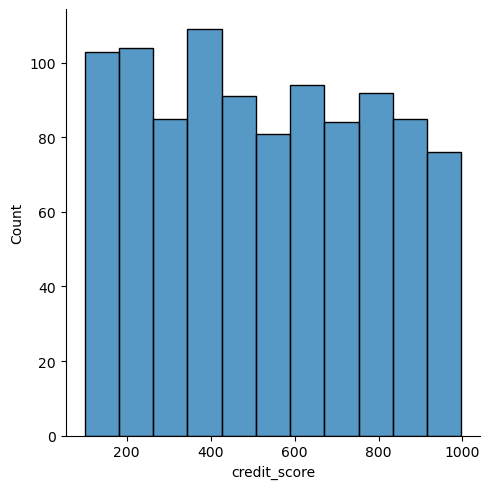

In [5]:
# credit score distribution
sns.displot(df['credit_score'])

# Data Pre-processing

Cleaning the data, handling missing values, and normalizing features.

In [6]:
# Convert 'result' to lowercase and map to numbers
df['result'] = df['result'].str.lower()

# Label encoding (1 to yes, 0 to no)
le = LabelEncoder()
df['result']= le.fit_transform(df['result'])

# Double-check unique values
df['result'].value_counts()

result
0    521
1    483
Name: count, dtype: int64

In [7]:
# Drop insignificant data
df.drop(columns = ['house_number'], inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,1
1,205,10016,395,13660,1
2,257,10129,109,13746,1
3,246,10064,324,13771,1
4,117,10115,496,13822,1


In [8]:
df.tail()

,initial_payment,last_payment,credit_score,sum,result
999,168,14798,834,20737,0
1000,234,14567,756,20678,1
1001,450,13897,867,210456,1
1002,347,14999,687,246789,1
1003,467,13555,666,21786,1


<Axes: >

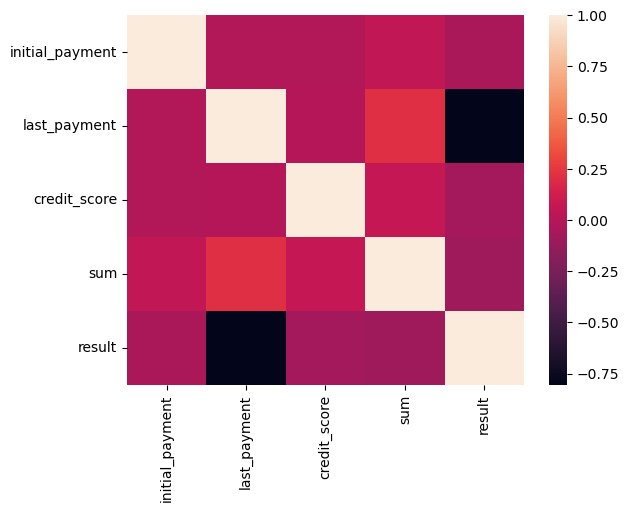

In [9]:
# Correlation matrix
sns.heatmap(df.corr())

In [10]:
# Features and target
X = df.drop('result', axis=1)
y = df['result']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

Implementing and evaluating machine learning model - Decision Tree

In [11]:
# Create and train the Decision Tree model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluation

Evaluate the performance of the model.

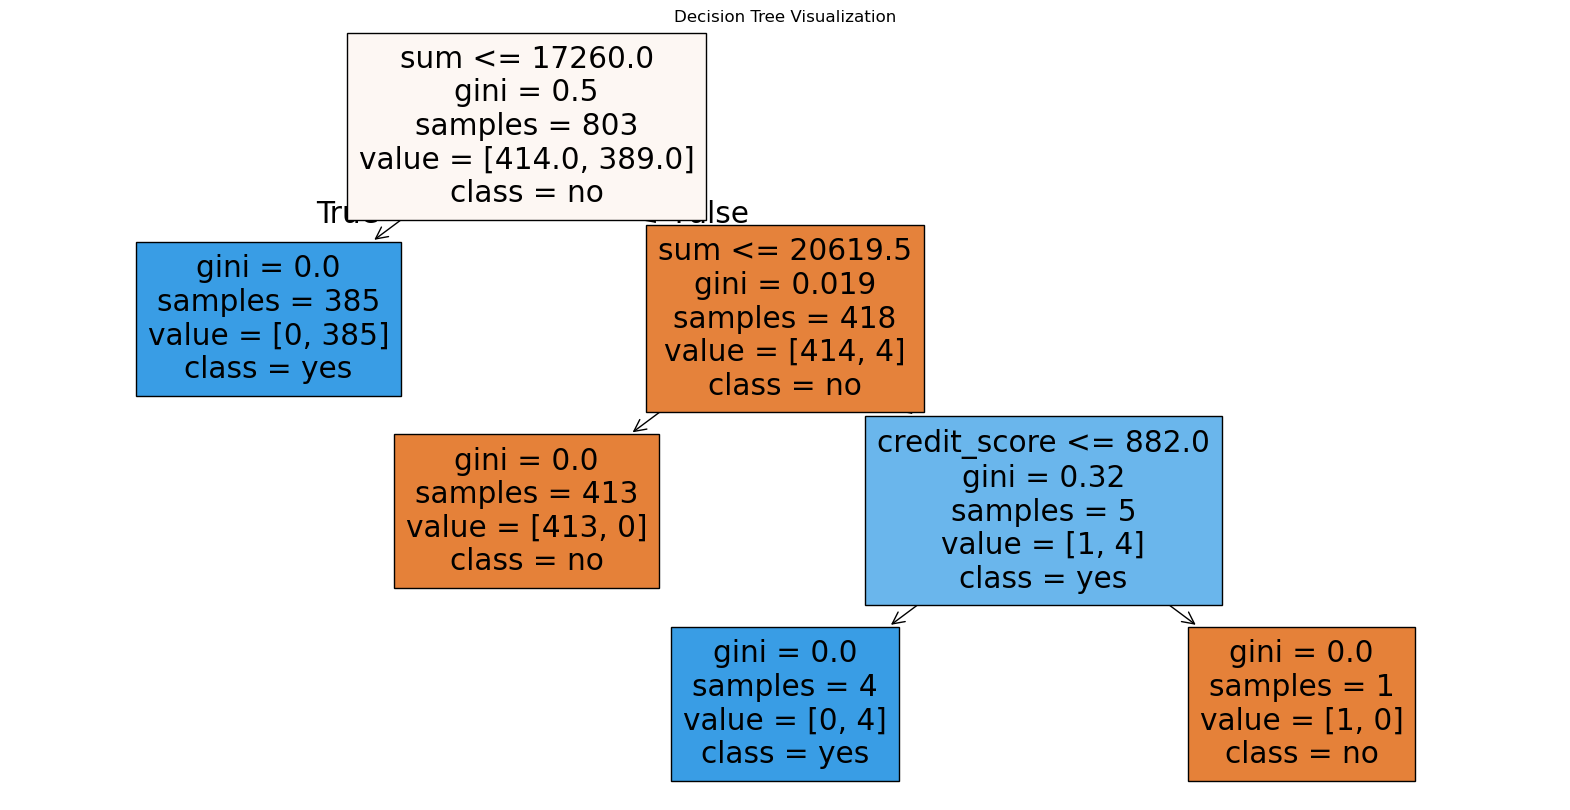

In [13]:
# Decision Tree vizualization
plt.figure(figsize=(20, 10))  # Set the plot size
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=["no", "yes"])
plt.title("Decision Tree Visualization")
plt.show()

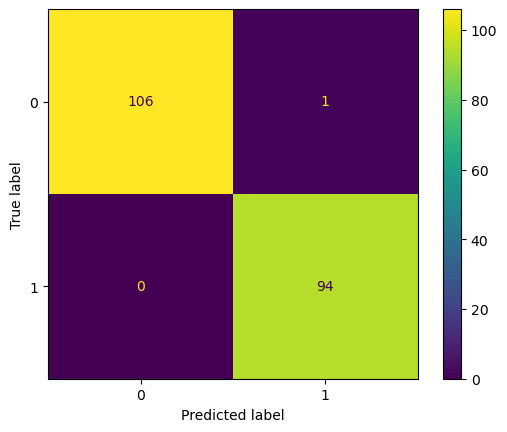

Accuracy: 1.00
              precision    recall  f1-score   support

          no       1.00      0.99      1.00       107
         yes       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

target_names = ['no', 'yes']
print(classification_report(y_test, y_pred, target_names=target_names))

## 10-Fold Cross-Validation

Since the model's accuracy was 1.0, this might mean the model is overfitting.

To better evaluate its performance, I used 10-fold cross-validation. This method splits the dataset into 10 equal parts (called folds). The model is trained on 9 folds and tested on the remaining 1 — repeating this process 10 times.

This helps check how well the model generalizes to new, unseen data and reduces the risk of overfitting.

In [15]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=10)

print("Fold Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Fold Scores: [0.75247525 1.         1.         1.         1.         1.
 1.         1.         1.         0.79      ]
Average Accuracy: 0.9542475247524752
Standard Deviation: 0.09188885306454689


### Conclusion
The model performs very well overall, but a couple of folds had lower accuracy (like 75% and 79%).
This confirms the model is not overfitting, but it might be very sensitive to certain data splits.